In [29]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import spectrum_painting as sp
import spectrum_painting_data as sp_data
import spectrum_painting_plotting as sp_plot

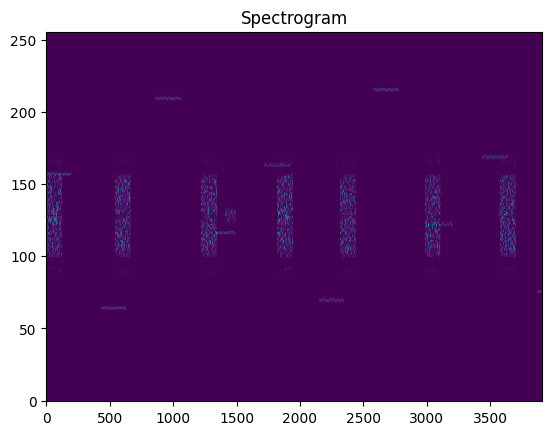

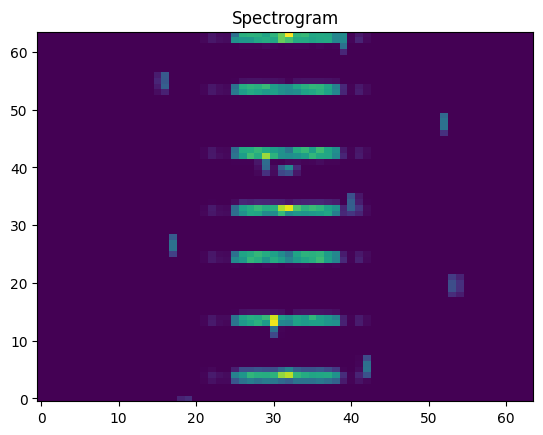

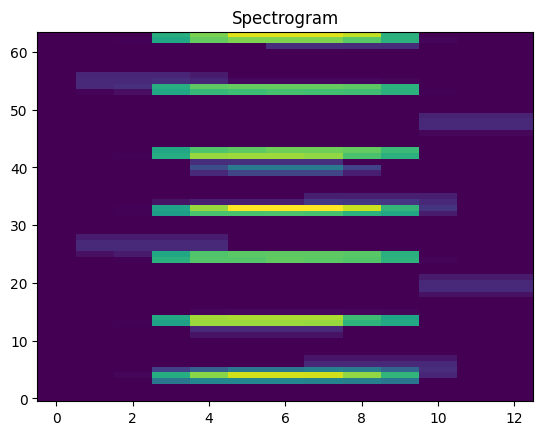

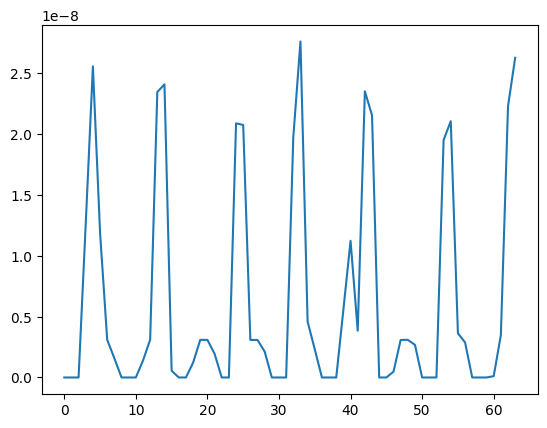

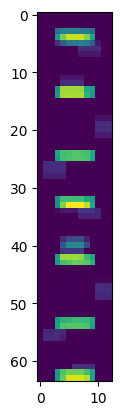

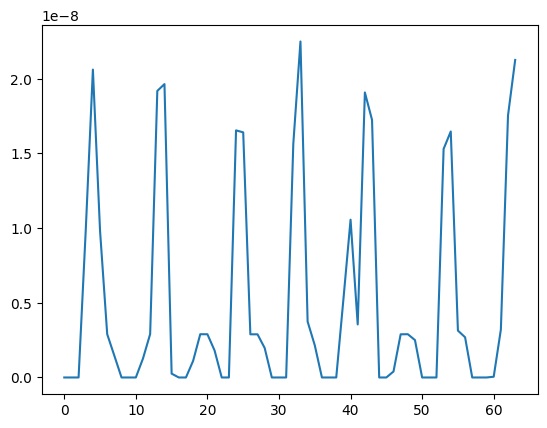

In [46]:
# Reload spectrum painting module in case the code changed
# and you want what is executed to be what you wrote.
reload(sp_data)
reload(sp_plot)
reload(sp)

spectrograms = sp_data.load_spectrograms(data_dir="data/numpy",
                                         classes=["Z", "B", "W", "BW", "ZB", "ZW", "ZBW"],
                                         snr_list=[30],
                                         # 20 MHz
                                         sample_rate=20000000,
                                         count=500000)

spec = spectrograms["ZBW"][0]
# spec=sp.take_frequencies(spec, 90, 160)
sp_plot.plot_spectrogram(spec.values)

downsampled = sp.downsample_spectrogram(spectrogram=spec.values, resolution=64)
sp_plot.plot_spectrogram(downsampled.T)

augmented = sp.augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
sp_plot.plot_spectrogram(augmented)

plt.plot(np.max(augmented, axis=1))
plt.show()

painted = sp.paint_spectrogram(original=downsampled, augmented=augmented)
plt.imshow(painted)
plt.show()

plt.plot(np.max(painted, axis=1))
plt.show()
